<a href="https://colab.research.google.com/github/yiyichanmyae/tensorflow/blob/master/2_3_human_vs_horse_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Image Data Generator
*   Normalize ( scale )



In [1]:
from keras.losses import Loss
import urllib.request
import zipfile
import tensorflow as tf


def getDataFromUrl(url_, file_location):
  urllib.request.urlretrieve(url_, file_location)

def extractZip(zip_, folder_dir):
  zip_ref = zipfile.ZipFile(zip_, "r")
  zip_ref.extractall(folder_dir)
  zip_ref.close()

# load data
training_file_name = "h-or-h-train.zip"
training_dir = "h-or-h/training"
validation_file_name = "h-or-h-validation.zip"
validation_dir = "h-or-h/vlidation"

training_url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
getDataFromUrl(training_url, training_file_name)
extractZip(training_file_name, training_dir)

# urllib.request.urlretrieve(training_url, training_file_name)
# zip_ref = zipfile.ZipFile(training_file_name, "r")
# zip_ref.extractall(training_dir)
# zip_ref.close()

validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"
getDataFromUrl(validation_url, validation_file_name)
extractZip(validation_file_name, validation_dir)

# urllib.request.urlretrieve(validation_url, validation_file_name)
# zip_ref = zipfile.ZipFile(validation_file_name, "r")
# zip_ref.extractall(validation_dir)
# zip_ref.close()

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# normalize, data augmentation,
data_gen_args = dict(rescale = 1./255,
                      rotation_range=30,
                      width_shift_range=.1,
                      height_shift_range=.1,
                      shear_range=.1,
                      zoom_range=.1,
                      horizontal_flip=True,
                      )

data_params = dict(
    target_size=(300, 300),
    batch_size = 64,
    class_mode = 'binary')


train_datagen = ImageDataGenerator(**data_gen_args)
data_params["directory"] = training_dir
train_XY = train_datagen.flow_from_directory(**data_params)


validation_datagen = ImageDataGenerator(1./255)
data_params["directory"] = validation_dir
validation_XY = validation_datagen.flow_from_directory(**data_params)


# create model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

from tensorflow.keras.optimizers import RMSprop

# Set training parameters
model.compile(loss='binary_crossentropy',
              optimizer="adam", #RMSprop(learning_rate=1e-3), #adam
              metrics=['accuracy'])

history = model.fit(train_XY,
                    epochs = 20,
                    steps_per_epoch=17, #(num_samples / batch_size).
                    validation_data=validation_XY)



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/20
17/17 [==============================] - ETA: 0s - loss: 0.9964 - accuracy: 0.5560

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


17/17 [==============================] - 35s 2s/step - loss: 0.9964 - accuracy: 0.5560 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 2/20
17/17 [==============================] - 27s 2s/step - loss: 0.6612 - accuracy: 0.6514 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/20
17/17 [==============================] - 29s 2s/step - loss: 0.5602 - accuracy: 0.7644 - val_loss: 0.7655 - val_accuracy: 0.5000
Epoch 4/20
17/17 [==============================] - 27s 2s/step - loss: 0.4439 - accuracy: 0.8179 - val_loss: 1.0222 - val_accuracy: 0.5000
Epoch 5/20
17/17 [==============================] - 27s 2s/step - loss: 0.2823 - accuracy: 0.8841 - val_loss: 1.2762 - val_accuracy: 0.5234
Epoch 6/20
17/17 [==============================] - 27s 2s/step - loss: 0.1935 - accuracy: 0.9221 - val_loss: 1.0522 - val_accuracy: 0.6211
Epoch 7/20
17/17 [==============================] - 27s 2s/step - loss: 0.1246 - accuracy: 0.9523 - val_loss: 1.4255 - val_accuracy: 0.6172
Epoch 8/20
17/17 [=============

In [2]:
# calculating steps per epoch = (num_samples / batch_size)
import os
batch_size = 64

total = 0
for i in os.listdir(training_dir):
  total = total + len(os.listdir(os.path.join(training_dir,i)))
  print(len(os.listdir(os.path.join(training_dir,i))))
print(total)
print(total/ batch_size)

527
500
1027
16.046875


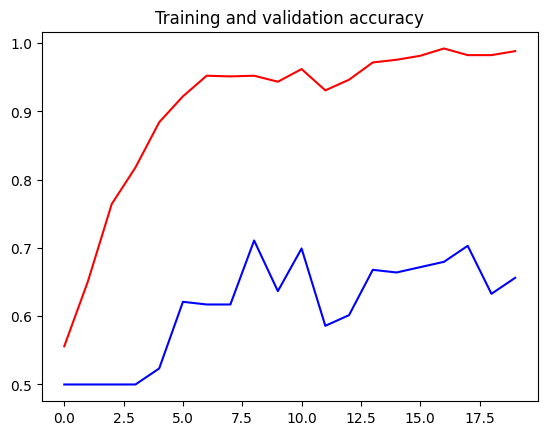

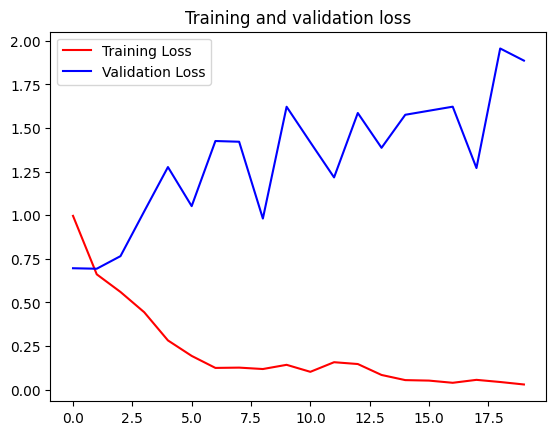

In [3]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
